Found 14384 images belonging to 2 classes.
Found 3594 images belonging to 2 classes.
['img_1.png', 'testing.ipynb', 'balanced_ai_suggested_3.h5', 'img_2.png', 'img.png', 'img_3.png']


2023-04-24 08:03:44.350787: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-24 08:03:44.350801: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-24 08:03:44.350811: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2023-04-24 08:03:44.351247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


113/113 [==============================] - 314s 3s/step - loss: 0.4268 - accuracy: 0.7938
Test accuracy: 0.7938230633735657
113/113 [==============================] - 349s 3s/step
[[834 963]
 [914 883]]
              precision    recall  f1-score   support

           0       0.48      0.46      0.47      1797
           1       0.48      0.49      0.48      1797

    accuracy                           0.48      3594
   macro avg       0.48      0.48      0.48      3594
weighted avg       0.48      0.48      0.48      3594



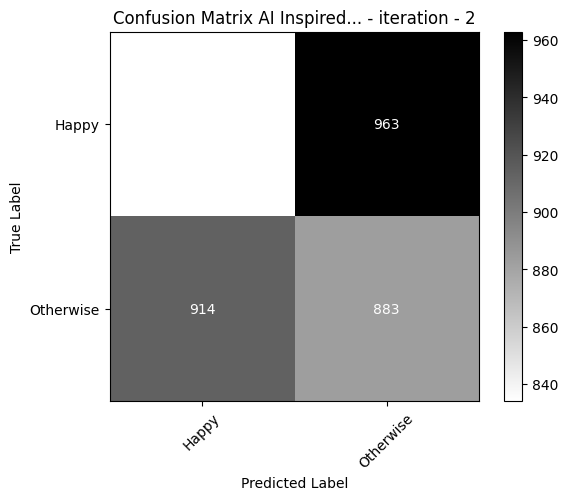

In [4]:
# new AI suggested model
# Load VGG16 model without the top layer
import tensorflow as tf


import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import os


seed = 415
batch_size = 32
image_path = "../../balanced"

datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2,
                              zoom_range = 0.1, # Randomly zoom image
                              width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                              height_shift_range=0.1,
                             rotation_range=25
                             )


# I changed the imagery to grayscale to speed up the training process
train_generator = datagen.flow_from_directory(
    image_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

test_generator = datagen.flow_from_directory(
    image_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')



# Add custom layers on top of the base model
print(os.listdir())

model = load_model("balanced_ai_suggested_3.h5")


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



model_description = "AI Inspired..."

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_actual = test_generator.classes


# should round to 0 or 1...
y_pred = np.round(y_pred)

confusion_mtx = confusion_matrix(y_actual, y_pred)
print(confusion_mtx)

# Evaluation
print(classification_report(test_generator.classes, y_pred))

plt.imshow(confusion_mtx, cmap='binary', interpolation='nearest')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Happy', 'Otherwise'], rotation=45)
plt.yticks(tick_marks, ['Happy', 'Otherwise'])

thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j]), ha="center", va="center", color="white" if confusion_mtx[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix {model_description} - iteration - 2')

plt.show()
